In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('house price dataset.csv')

# Selecting the features and target
X = data[['LotArea']]  # Independent variable
y = data['SalePrice']  # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a CatBoost Regressor model
model = CatBoostRegressor(iterations=500,
                          depth=3,
                          learning_rate=0.05,
                          loss_function='RMSE',
                          verbose=50)

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean squared error: {mse:.2f}")
print(f"R^2 score: {r2:.2f}")

Saving house price dataset.csv to house price dataset.csv
0:	learn: 76466.2165033	total: 47.4ms	remaining: 23.7s
50:	learn: 67813.4520531	total: 69.4ms	remaining: 611ms
100:	learn: 67161.5740734	total: 86.9ms	remaining: 343ms
150:	learn: 66693.9655720	total: 122ms	remaining: 283ms
200:	learn: 66166.7246633	total: 158ms	remaining: 235ms
250:	learn: 65714.7862312	total: 191ms	remaining: 190ms
300:	learn: 65235.0721553	total: 209ms	remaining: 138ms
350:	learn: 64723.9554223	total: 236ms	remaining: 100ms
400:	learn: 64249.1863546	total: 265ms	remaining: 65.4ms
450:	learn: 63899.5394475	total: 294ms	remaining: 31.9ms
499:	learn: 63598.8110859	total: 325ms	remaining: 0us
Mean squared error: 5804382836.32
R^2 score: 0.24


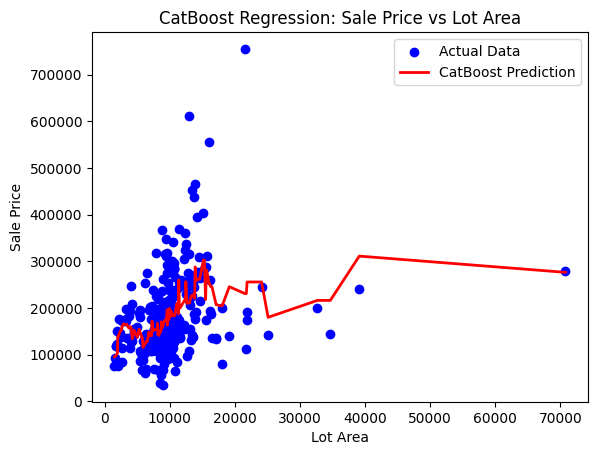

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting the test data and predictions for better visualization
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_indices]
y_test_sorted = y_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting the test data
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='CatBoost Prediction')

# Adding labels and title
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('CatBoost Regression: Sale Price vs Lot Area')

# Adding a legend
plt.legend()

# Display the plot
plt.show()